In [1]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    document = document.replace('.','')
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:
        if word not in word_to_index.keys():    # 
            word_to_index[word] = len(word_to_index)
            bow.insert(len(word_to_index)-1,1)
        else:
            index = word_to_index.get(word)
            bow[index] = bow[index] + 1

    return word_to_index, bow

doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary:', vocab)
print('bag of words vector:', bow)

vocabulary: {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [2]:
doc2 = "소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다."

vocab, bow = build_bag_of_words(doc2)
print('vocabulary:',vocab)
print('bag of words vector :', bow)

vocabulary: {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [3]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

print('bag of words vector :', vector.fit_transform(corpus).toarray())

print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [6]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)


bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [7]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [8]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


In [9]:
import wget

wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

'imdb (1).xlsx'

In [10]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)

In [11]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# max_featueres :빈도순으로 최대 500단어까지 포함
# stop_words='english' : 불용어(관사, 전치사등을 제거)
cv = CountVectorizer(max_features=500,stop_words='english')

In [13]:
tdm = cv.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [14]:
tdm.shape

(748, 500)

In [15]:
cv.get_feature_names()[:10]

c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [16]:
tdm.sum(axis=0)

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [17]:
word_count = pd.DataFrame({
        '단어' : cv.get_feature_names(),
        '빈도' : tdm.sum(axis=0).flat
})

In [18]:
word_count

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
...,...,...
495,wrong,3
496,year,5
497,years,14
498,yes,3


In [19]:
word_count.sort_values('빈도',ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


In [20]:
word_count.to_csv('word_count.csv')

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd

word_count = pd.read_csv('word_count.csv',index_col=0)
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


In [23]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',max_words=100,width=400,height=300)

In [24]:
wc

In [25]:
word_count.set_index('단어')['빈도']

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [26]:
# dictionary로 만드는 방법1
count_dic = word_count.set_index('단어')['빈도'].to_dict()

count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [27]:
# dictionary로 만드는 방법2
dict(zip(word_count['단어'],word_count['빈도']))

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [28]:
cloud = wc.fit_words(count_dic)

In [29]:
cloud

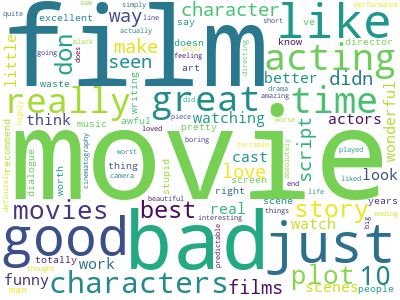

In [30]:
cloud.to_image()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500,stop_words='english')

In [32]:
tdm = tfidf.fit_transform(df['review'])
tdm

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [33]:
print(tdm)

  (0, 264)	0.43676152065842583
  (0, 499)	0.5112421488050499
  (0, 284)	0.23148088751652843
  (0, 286)	0.5112421488050499
  (0, 385)	0.48261672511123166
  (1, 185)	0.4508252485652821
  (1, 27)	0.4630757536620436
  (1, 61)	0.330043211383874
  (1, 253)	0.4775650258680224
  (1, 417)	0.4952984618525245
  (2, 293)	0.3326996842333155
  (2, 242)	0.30667834544717537
  (2, 319)	0.24142314513946203
  (2, 321)	0.3140711939059074
  (2, 5)	0.22041303500891976
  (2, 354)	0.32260561111952785
  (2, 108)	0.3140711939059074
  (2, 54)	0.2890474338764623
  (2, 71)	0.32260561111952785
  (2, 475)	0.30015739096222105
  (2, 43)	0.2943241984036562
  (2, 284)	0.15064019733663225
  (3, 394)	0.6747516922530598
  (3, 287)	0.5316526285937699
  (3, 244)	0.5119137000618044
  :	:
  (739, 146)	1.0
  (740, 9)	0.83021432552157
  (740, 182)	0.5574443234070687
  (741, 250)	0.6167137686897145
  (741, 481)	0.4797072301038725
  (741, 405)	0.4694360111750707
  (741, 239)	0.41130880407139175
  (742, 284)	1.0
  (743, 46)	0.59810

In [34]:
word_count = pd.DataFrame({
    '단어' : tfidf.get_feature_names(),
    'tf-idf' : tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head()

c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=500, stop_words = 'english')
tdm2 = cv.fit_transform(df['review'])
tdm2

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.feature_extraction.text import  TfidfTransformer
trans = TfidfTransformer()
tdm3 = trans.fit_transform(tdm2)
tdm3

<748x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [42]:
import numpy as np

np.allclose(tdm.A,tdm3.A)

True

In [44]:
wc2 = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    'tf-idf' : tdm3.sum(axis=0).flat
})

wc2.sort_values('tf-idf',ascending=False).head()

c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656


In [2]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 451.5 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-10-28 10:21:16.832846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-28 10:21:16.833023: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-28 10:21:20.475628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-28 10:21:20.475746: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-28 10:21:20.481340: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-HOC3AFT
2022-10-28 10:21:20.481699: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-HOC3AFT


In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')

text = "Wikipedia is maintained by volumteers."
doc = nlp(text)

In [4]:
for token in doc:
    print(token.text,
          token.lemma_,  # 표제어
          token.pos_,    # 단어의 품사
          token.tag_,    # 자세한 품사
          token.dep_,    # 문법적 의존 관계
          token.is_stop) # 불용어 여부

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volumteers volumteer NOUN NNS pobj False
. . PUNCT . punct False


In [5]:
spacy.explain('PROPN')

'proper noun'

In [7]:
def extract_nv(text):
    doc = nlp(text)
    words = []
    for token in doc:
        print(token.tag_)
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
    return words

In [8]:
extract_nv('Apple is a company')

NNP
VBZ
DT
NN


['apple', 'be', 'company']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, tokenizer=extract_nv)

In [10]:
import pandas as pd
df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
tdm = cv.fit_transform(df['review'])

DT
RB
,
JJ
,
RB
RB
HYPH
VBG
,
JJ
NN
IN
DT
JJ
,
VBG
JJ
NN
.
_SP
RB
JJ
WP
VBD
RBR
VBN
:
DT
JJ
NNS
CC
DT
NN
,
RB
NN
IN
WP
VBD
RP
.
_SP
VBG
NN
IN
JJ
CC
JJ
CC
JJ
NN
NNS
,
DT
NN
VBN
,
VBD
RB
RBR
JJ
:
IN
DT
NN
VBD
JJ
CC
DT
NN
CC
NNS
RB
JJ
JJ
JJ
.
_SP
RB
JJ
NN
CC
NN
TO
VB
IN
.
_SP
DT
JJS
NN
IN
DT
NN
VBD
WRB
NNP
VBZ
VBG
TO
VB
DT
NN
WDT
VBZ
VBG
IN
PRP$
NN
.
_SP
DT
NN
IN
DT
NN
VBZ
NN
,
NN
,
VBG
NFP
IN
PRP
VBZ
IN
NN
,
PRP
VBZ
PRP
VBP
IN
PRP
VBZ
JJ
.
_SP
VBD
CD
NNS
.
_SP
VBD
DT
NN
NN
CC
VBD
PRP
VBD
DT
JJ
NN
,
JJ
NNS
IN
NNS
.
_SP
DT
NN
JJ
.
_SP
VBD
DT
NN
IN
NNP
NNP
IN
DT
NN
NN
.
_SP
CC
DT
NN
NNS
VBD
JJ
.
_SP
DT
NN
VBD
DT
NN
IN
NNP
IN
PRP
VBZ
JJS
,
VBD
PRP
VB
RB
JJ
.
_SP
DT
NNS
VBD
DT
JJS
CC
DT
NNS
VBD
RB
JJ
.
_SP
PRP
VBD
RB
JJ
.
_SP
DT
VBZ
DT
RB
``
JJ
IN
NN
''
NN
WDT
VBZ
NN
RB
RB
IN
PRP$
NN
.
_SP
PRP
VBD
DT
JJ
NN
IN
DT
JJ
NN
,
CC
PRP
VBD
DT
JJ
NN
IN
PRP
RB
MD
VB
.
_SP
DT
NN
VBZ
RB
JJ
,
IN
PRP
VBP
DT
NN
IN
CD
NNS
TO
VB
DT
JJ
JJS
NN
RB
VBD
.
_SP
PRP
MD
VB
DT
NN
RP
IN
DT
NN
IN
NNS
IN
NN
,
NN
,
NN
,
NN


In [12]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
wc.sort_values('빈도', ascending=False).head()

,단어,빈도
28,be,845
263,movie,211
126,film,189
166,have,119
92,do,112
